In [1]:
import pandas as pd
from termcolor import cprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
import spacy
import sklearn.metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from numpy import mean
from numpy import std
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from stop_words import get_stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ojoho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ojoho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ojoho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('cleaned_dataBase.csv')

In [5]:
df

,title,age_rating,Movie_Genre,Movie_Script,final_text,final_text2
0,Reservoir Dogs,18,"Action,Crime,Thriller",Quentin Tara...,Quentin Tara...,quentin tarantino october movie dedicated foll...
1,How to Train Your Dragon,PG,"Animation,Adventure,Comedy",HOW TO TRAIN YO...,HOW TRAIN YOUR ...,train dragon written dean deblois chris sander...
2,Scream,18,"Horror,Mystery,Thriller",...,...,scream scary movie kevin williamson rewrite ju...
3,Groundhog Day,PG,"Comedy,Fantasy,Romance",GROUNDH...,GROUNDH...,groundhog written danny rubin second revision ...
4,Black Panther,12,"Action,Adventure,Sci-Fi",BLACK PANTHER ...,BLACK PANTHER ...,black panther written ryan coogler joe robert ...
...,...,...,...,...,...,...
1041,You Can Count On Me,15,Drama,"""YOU CAN COU...",YOU CAN COUN...,count screenplay kenneth lonergan shooting dra...
1042,You've Got Mail,PG,"Comedy,Romance",You've Got Mail \t\t\tYou've Got Mail \t...,You have Got Mail \t\t\tYou have Got Mail...,got mail got mail nora ephron delia ephron bas...
1043,Youth in Revolt,15,"Comedy,Drama,Romance",...,...,youth revolt written gustin nash july black co...
1044,Zero Dark Thirty,15,"Drama,Thriller",ZERO DARK...,ZERO DARK...,zero dark thirty written mark boal october voi...


In [6]:
age_values = {'12': 1,
                 'PG' : 0,
                 '15' : 2,
                 '18' : 3}
df['age'] = df['age_rating'].replace(age_values)

### Data Balancing

In [7]:
age12 = df[df['age_rating'] == '12']

In [8]:
agePG = df[df['age_rating'] == 'PG']

In [9]:
age15 = df[df['age_rating'] == '15']

In [10]:
age18 = df[df['age_rating'] == '18']

In [11]:
len(age15)

449

In [12]:
len(agePG)

123

In [13]:
len(age12)

213

In [14]:
len(age18)

261

In [15]:
age12_resample = resample(age12, replace = True, n_samples=449, random_state=143)
agePG_resample = resample(agePG, replace = True, n_samples=449, random_state=143)
age18_resample = resample(age18, replace = True, n_samples=449, random_state=143)

In [16]:
df2 = pd.concat([age15, age12_resample, agePG_resample, age18_resample ])

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796 entries, 7 to 2
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1796 non-null   object
 1   age_rating    1796 non-null   object
 2   Movie_Genre   1796 non-null   object
 3   Movie_Script  1796 non-null   object
 4   final_text    1796 non-null   object
 5   final_text2   1796 non-null   object
 6   age           1796 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 112.2+ KB


In [35]:
one_hot = pd.get_dummies(df2['age'])

In [36]:
one_hot

,0,1,2,3
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0
10,0,0,1,0
15,0,0,1,0
...,...,...,...,...
838,0,0,0,1
352,0,0,0,1
566,0,0,0,1
286,0,0,0,1


In [37]:
np.save('binarized_age.npy', one_hot)

### Data Transformation

+ Tfidf transformation

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.005, 
                          stop_words = get_stop_words('en'))

lemmatized_bow=tfidf_vectorizer.fit_transform(df2['final_text2'])

#check shape of resulting matrices
lemmatized_bow.shape

C:\Users\ojoho\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


(1796, 40244)

In [19]:
#each plot is a row vector of the TFIDF sparse matrices
df2['lemmatized_bow_plot'] = [plot for plot in lemmatized_bow]

#save TFIDF matrices an numpy arrays
np.save('lemmatized_age.npy',lemmatized_bow.toarray())

+ word2vec

In [20]:
from gensim import models

In [21]:
#Load the pretrained google news word2vec model
model = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [22]:
#collect words not in the Google News w2v model
not_w2v = []

#word2vec function
def apply_words2Vec(cleaned_plot, mean=False):
    
    """
    apply_words2Vec()
    -applies the following transformations to the cleaned plot of a movie:
        1) removes words that are not in google's model
        2) creates a 300-dimension vector representation of each word
        3) outputes vector of vectors for plot
        If mean = True
        4) converts the resulting nd_array into a 1d_array via np.mean() and
           outputs single vector for each plot.
    -also keeps track of all words not found in google's model
    
    -inputs: cleaned_plot (string)
    
    -outputs: vector representation of plot
    
    """
    vecs=[]
    for word in cleaned_plot:
        #add word vector to list if it is in the google model
        try:
            vecs.append(model.get_vector(word)) 
        except:
            #if the word is not in the w2v model, add it to
            #our list of skipped words
            not_w2v.append(word)
    
    #take the column-wise mean of vecs to reduce nd_aray to 1d_array
    if mean == True:
        vecs = np.mean(vecs, axis=0)
        return vecs
    #return matrix of w2v arrays where each row is a word in the plot
    return np.stack(vecs)

In [23]:
#apply transformation to three sets of plots and add columns to df

#columns with mean w2v
df2['w2v_plot_mean'] = df2['final_text2'].apply(lambda x: apply_words2Vec(x, mean=True))

#check shapes of first movie vectors to confirm nd_array and 300-dimensions
print('Mean vector representations:')
print(df2.loc[0,'w2v_plot_mean'].shape)


Mean vector representations:
(3,)


In [24]:
#print some of our skipped words
print(len(not_w2v))
np.random.seed(112)
print(np.random.choice(not_w2v, 50, replace=False))

26252201
['a' ' ' 'a' ' ' ' ' 'a' 'a' ' ' ' ' ' ' ' ' ' ' 'a' 'a' ' ' ' ' 'a' 'a'
 'a' ' ' ' ' 'a' 'a' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'a' ' ' ' ' ' '
 'a' 'a' 'a' 'a' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'a' 'a']


In [25]:
for plot in df2.w2v_plot_mean:
    if len(plot) != 300:
        print("AH! no word2vec representation")
print('All movies have a word2vec representation.')


All movies have a word2vec representation.


In [26]:
#w2v mean vectors
np.save('w2v_mean_age.npy', df2['w2v_plot_mean'].to_numpy())

+ doc2vec

In [27]:
#turn plots into TaggedDocuments
#apply to movies df for imdb, tmdb, and combined
cols = ['final_text2']
n_cols = ['final_text2_tag_docs']
for ncol, col in zip(n_cols, cols):
    acc = []
    for i, plot in enumerate(df2[col]): 
        z = models.doc2vec.TaggedDocument(words=plot, tags=[str(i)])
        acc.append(z)
    df2[ncol] = acc
df2['final_text2_tag_docs'][:1]

7    (holding written anthony cipriano fade neighbo...
Name: final_text2_tag_docs, dtype: object

In [28]:
cols = ['final_text2_tag_docs']
n_cols = ['final_text2_doc_vec']
for ncol, col in zip(n_cols, cols):
    model = models.doc2vec.Doc2Vec(alpha=0.025, min_alpha=0.001, vector_size=20, dm=0, window=5)
    model.build_vocab(df2[col])
    model.train(df2[col], total_examples=1796, epochs=4)
    df2[ncol] = [model.docvecs[x] for x in range(1796)]
    
df2['final_text2_doc_vec'][0]

C:\Users\ojoho\AppData\Local\Temp/ipykernel_15984/43456829.py:7: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  df2[ncol] = [model.docvecs[x] for x in range(1796)]


0    [-0.15048993, -0.14187676, -0.31540665, 0.1740...
0    [-0.07431694, -0.16285771, -0.24529226, 0.1800...
0    [-0.10177396, -0.13632007, -0.3237102, 0.07208...
Name: final_text2_doc_vec, dtype: object

In [29]:
np.save('final_text2_doc_vec_age.npy', df2['final_text2_doc_vec'].to_numpy())

C:\Users\ojoho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_rating', ylabel='count'>

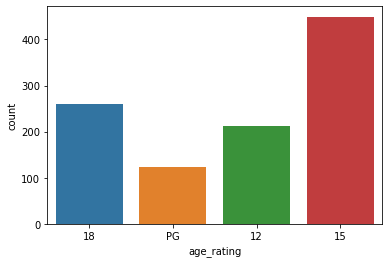

In [31]:
sns.countplot(df["age_rating"])